Observations:
1. Urban cities have more drivers than suburban, and suburban more than rural. This makes sense that there would be more drivers where there are more people.
2. Urban cities have more rides than suburban, and suburban more than rural.
3. But Rural has the highest average fare, followed by suburban. This makes sense as destinations are probably farther apart in rural settings.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [3]:
# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [4]:
# Combine the data into a single dataset
merged_df = pd.merge(ride_df,city_df,on="city",how="outer")

# Display the data table for preview
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [5]:
# Obtain the x and y coordinates for each of the three city types
city_type = city_df.set_index("city")["type"]
city_type.head()

city
Richardfort     Urban
Williamsstad    Urban
Port Angela     Urban
Rodneyfort      Urban
West Robert     Urban
Name: type, dtype: object

In [6]:
city_grouped_df = merged_df.groupby("city")
rides_per_city = city_grouped_df["ride_id"].count()
rides_per_city.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [7]:
avg_fare_per_city = city_grouped_df["fare"].mean()
avg_fare_per_city.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [8]:
drivers_per_city = city_grouped_df["driver_count"].mean()
drivers_per_city.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [9]:
all_city_info = pd.DataFrame({
    "Type": city_type,
    "Ride Count": rides_per_city,
    "Avg Fare": avg_fare_per_city,
    "Driver Count": drivers_per_city
})
all_city_info.head()

,Type,Ride Count,Avg Fare,Driver Count
Amandaburgh,Urban,18,24.641667,12
Barajasview,Urban,22,25.332273,26
Barronchester,Suburban,16,36.422500,11
Bethanyland,Suburban,18,32.956111,22
Bradshawfurt,Rural,10,40.064000,7


In [10]:
urban = all_city_info[all_city_info["Type"] == "Urban"]
urban.head()

,Type,Ride Count,Avg Fare,Driver Count
Amandaburgh,Urban,18,24.641667,12
Barajasview,Urban,22,25.332273,26
Carriemouth,Urban,27,28.314444,52
Christopherfurt,Urban,27,24.501852,41
Deanville,Urban,19,25.842632,49


In [11]:
suburban = all_city_info[all_city_info["Type"] == "Suburban"]
suburban.head()

,Type,Ride Count,Avg Fare,Driver Count
Barronchester,Suburban,16,36.422500,11
Bethanyland,Suburban,18,32.956111,22
Brandonfort,Suburban,19,35.437368,10
Colemanland,Suburban,22,30.894545,23
Davidfurt,Suburban,17,31.995882,23


In [12]:
rural = all_city_info[all_city_info["Type"] == "Rural"]
rural.head()

,Type,Ride Count,Avg Fare,Driver Count
Bradshawfurt,Rural,10,40.064000,7
Garzaport,Rural,3,24.123333,7
Harringtonfort,Rural,6,33.470000,4
Jessicaport,Rural,6,36.013333,1
Lake Jamie,Rural,6,34.358333,4


Text(42, 35, 'Note:\nCircle size correlates with driver count per city')

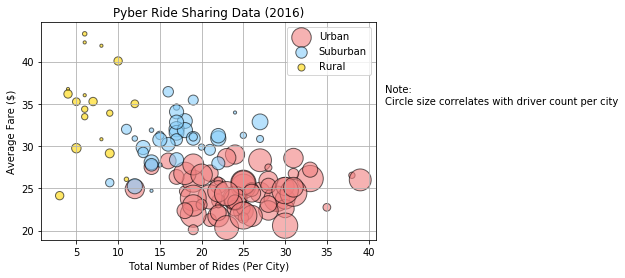

In [13]:
plt.scatter(urban["Ride Count"],urban["Avg Fare"],s=urban["Driver Count"]*10,label="Urban",edgecolor="black",alpha=.6,color="lightcoral")
plt.scatter(suburban["Ride Count"],suburban["Avg Fare"],s=suburban["Driver Count"]*10,label="Suburban",edgecolor="black",alpha=.6,color="lightskyblue")
plt.scatter(rural["Ride Count"],rural["Avg Fare"],s=rural["Driver Count"]*10,label="Rural",edgecolor="black",alpha=.6,color="gold")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.legend()
plt.text(42,35,"Note:\nCircle size correlates with driver count per city")

In [14]:
# Save Figure
plt.savefig("pyberBubble.png")

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

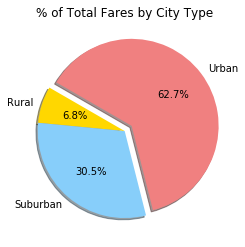

In [16]:
# Calculate Type Percents
city_by_type = merged_df.groupby("type")
fare_total = city_by_type["fare"].sum()

# Build Pie Chart
explode = [0,0,.1]
labels = ["Rural","Suburban","Urban"]
plt.pie(fare_total,startangle = 150,colors=["gold","lightskyblue","lightcoral"],explode=explode,autopct="%.1f%%",shadow=True,
       labels=labels)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("pyberFares.png")

## Total Rides by City Type

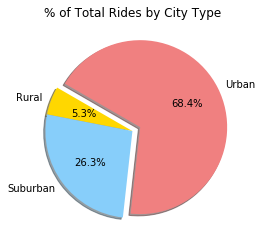

In [17]:
# Calculate Ride Percents
city_by_type = merged_df.groupby("type")
ride_total = city_by_type["ride_id"].count()

# Build Pie Chart
explode = [0,0,.1]
labels = ["Rural","Suburban","Urban"]
plt.pie(ride_total,startangle = 150,colors=["gold","lightskyblue","lightcoral"],explode=explode,autopct="%.1f%%",shadow=True,
       labels=labels)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("pyberRides.png")

## Total Drivers by City Type

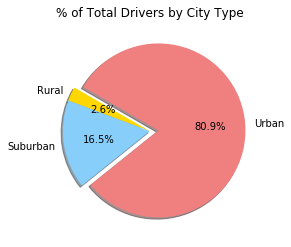

In [18]:
# Calculate Driver Percents
city_by_type = city_df.groupby("type")
driver_total = city_by_type["driver_count"].sum()

# Build Pie Charts
explode = [0,0,.1]
labels = ["Rural","Suburban","Urban"]
plt.pie(driver_total,startangle = 150,colors=["gold","lightskyblue","lightcoral"],explode=explode,autopct="%.1f%%",shadow=True,
       labels=labels)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("pyberDrivers.png")